In [1]:
! pip install pmdarima

     -------------------------------------- 568.9/568.9 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 986.3/986.3 kB 7.8 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import json
from gcd_data_manipulation import prepare_data
from pmdarima import auto_arima

import numpy as np
import pandas as pd

job_id = 3418339

with open('columns_selection.json') as f:
    columns_selection = json.load(f)

columns_to_consider = columns_selection['GWT_efficiency_1']

data = prepare_data(f'../data/task-usage_job-ID-{job_id}_total.csv', columns_to_consider, targets=[0], sliding_window=1, aggr_type='mean')


df = pd.DataFrame(data, columns=columns_to_consider)['Efficiency']

In [8]:
from statsmodels.tsa.stattools import adfuller

print(f'p-value: {adfuller(df["Efficiency"])[1]}')

p-value: 6.46078636509523e-14


In [21]:
from pmdarima.model_selection import train_test_split

train, test = train_test_split(df, train_size=8000)

In [22]:
stepwise_fit = auto_arima(train, start_p=1, start_q=1, test="adf", trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-43619.006, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11305.892, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-20254.022, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=392.483, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-43715.336, Time=2.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-28101.620, Time=3.37 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-44690.682, Time=7.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-43786.520, Time=7.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-44382.290, Time=8.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-43734.033, Time=2.78 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-43789.405, Time=8.68 sec
 ARIMA(2,0,2)(0,0,0)[0]      

In [24]:
forecast = stepwise_fit.predict(test.shape[0])

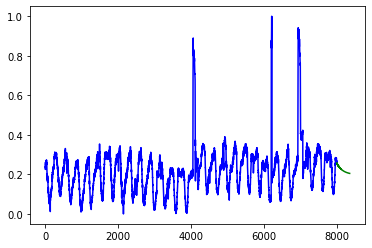

In [26]:
import matplotlib.pyplot as plt

x = np.arange(df.shape[0])
plt.plot(x[:8000], train, c='blue')
plt.plot(x[8000:], forecast, c='green')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (500,) and (8000,)

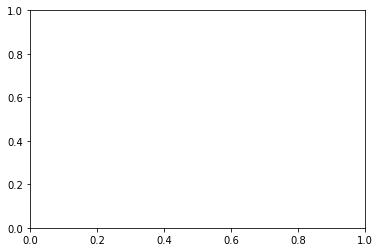

In [27]:
plt.plot(x[7500:8000], train, c='blue')
plt.plot(x[8000:], forecast, c='green')
plt.show()